
=== MÉTODO DE LA SECANTE ===
Condiciones iniciales: x0 = 0.5, x1 = 1.0

Iter 1: x0=0.500000, x1=1.000000, f(x1)=-0.459698, x2=0.725482, error=2.745184e-01
Iter 2: x0=1.000000, x1=0.725482, f(x1)=0.022698, x2=0.738399, error=1.291703e-02
Iter 3: x0=0.725482, x1=0.738399, f(x1)=0.001149, x2=0.739087, error=6.885907e-04
Iter 4: x0=0.738399, x1=0.739087, f(x1)=-0.000003, x2=0.739085, error=2.077921e-06
Iter 5: x0=0.739087, x1=0.739085, f(x1)=0.000000, x2=0.739085, error=3.150485e-10

 Convergencia alcanzada.

=== MÉTODO DE NEWTON-RAPHSON ===
Condición inicial: x0 = 0.5

Iter 1: x=0.500000, f(x)=0.377583, f'(x)=-1.479426, x_next=0.755222, error=2.552224e-01
Iter 2: x=0.755222, f(x)=-0.027103, f'(x)=-1.685451, x_next=0.739142, error=1.608075e-02
Iter 3: x=0.739142, f(x)=-0.000095, f'(x)=-1.673654, x_next=0.739085, error=5.653223e-05
Iter 4: x=0.739085, f(x)=-0.000000, f'(x)=-1.673612, x_next=0.739085, error=7.056461e-10

 Convergencia alcanzada.

=== COMPARACIÓN DE MÉTODOS ===
Raíz (Secante

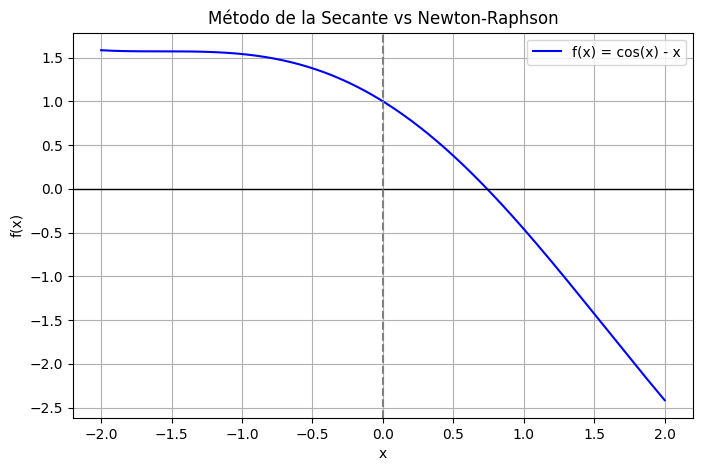

In [1]:
#Metodo secante 
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")


# Función del problema
def f(x):
    return np.cos(x) - x



# Método de la Secante
def secante(f, x0, x1, tol=1e-6, max_iter=100):
    print("\n=== MÉTODO DE LA SECANTE ===")
    print(f"Condiciones iniciales: x0 = {x0}, x1 = {x1}\n")

    iteraciones = []

    for i in range(max_iter):
        f0 = f(x0)
        f1 = f(x1)

        if f1 - f0 == 0:
            print(f"Iteración {i+1}: División por cero. El método falla.")
            break

        x2 = x1 - f1 * (x1 - x0) / (f1 - f0)
        error = abs(x2 - x1)

        iteraciones.append((i+1, x0, x1, f0, f1, x2, error))

        print(f"Iter {i+1}: x0={x0:.6f}, x1={x1:.6f}, f(x1)={f1:.6f}, x2={x2:.6f}, error={error:.6e}")

        if error < tol:
            print("\n Convergencia alcanzada.")
            return x2, i+1, iteraciones

        x0, x1 = x1, x2

    print("\n No se alcanzó la convergencia en el número máximo de iteraciones.")
    return x2, len(iteraciones), iteraciones



# Método de Newton-Raphson (para comparar)
def f_prime(x):
    return -np.sin(x) - 1  # Derivada de f(x) = cos(x) - x

def newton_raphson(f, f_prime, x0, tol=1e-6, max_iter=100):
    print("\n=== MÉTODO DE NEWTON-RAPHSON ===")
    print(f"Condición inicial: x0 = {x0}\n")

    iteraciones = []
    for i in range(max_iter):
        fx = f(x0)
        fpx = f_prime(x0)

        if fpx == 0:
            print(f"Iteración {i+1}: Derivada cero. El método falla.")
            break

        x1 = x0 - fx / fpx
        error = abs(x1 - x0)
        iteraciones.append((i+1, x0, fx, fpx, x1, error))

        print(f"Iter {i+1}: x={x0:.6f}, f(x)={fx:.6f}, f'(x)={fpx:.6f}, x_next={x1:.6f}, error={error:.6e}")

        if error < tol:
            print("\n Convergencia alcanzada.")
            return x1, i+1, iteraciones

        x0 = x1

    print("\n No se alcanzó la convergencia en el número máximo de iteraciones.")
    return x1, len(iteraciones), iteraciones



# Ejecución de ambos métodos
x0_secante = 0.5
x1_secante = 1.0
raiz_sec, it_sec, datos_sec = secante(f, x0_secante, x1_secante)

x0_newton = 0.5
raiz_new, it_new, datos_new = newton_raphson(f, f_prime, x0_newton)


# Comparación de resultados
print("\n=== COMPARACIÓN DE MÉTODOS ===")
print(f"Raíz (Secante): {raiz_sec:.6f} en {it_sec} iteraciones")
print(f"Raíz (Newton-Raphson): {raiz_new:.6f} en {it_new} iteraciones")
print(f"Diferencia entre raíces: {abs(raiz_sec - raiz_new):.2e}")


# Gráfica de la función
x_vals = np.linspace(-2, 2, 400)
plt.figure(figsize=(8,5))
plt.plot(x_vals, f(x_vals), label="f(x) = cos(x) - x", color='blue')
plt.axhline(0, color='black', linewidth=1)
plt.axvline(0, color='gray', linestyle='--')

plt.title("Método de la Secante vs Newton-Raphson")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid(True)
plt.legend()
plt.show()
